# Random Forest Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, balanced_accuracy_score
import pandas as pd
import openml
from openml import tasks
from random_forest import RandomForestClassifier
from SMOTE import smote
from metrics import accuracy, mse, rmse, mae
import torch

In [2]:
def encod_dict(X):
    dic={}
    values=X.unique()
    num=0
    for value in values:
        dic.update({value: num})
        num+=1
    
    return dic

## Importing the dataset

In [3]:
#EXAMPLE DATASETS
'''
pc4 id: 1049
wall-robot-navigation id: 1497
kc2 id: 1063
balance-scale id: 11
banknote-authentication id: 1462
steel-plates-fault id: 40982
phoneme id: 1489
spambase id: 44 <<<
kc1 id: 1067 >>>
breast-w id: 15 ........
'''

'\npc4 id: 1049\nwall-robot-navigation id: 1497\nkc2 id: 1063\nbalance-scale id: 11\nbanknote-authentication id: 1462\nsteel-plates-fault id: 40982\nphoneme id: 1489\nspambase id: 44 <<<\nkc1 id: 1067 >>>\nbreast-w id: 15 ........\n'

In [4]:
dataset = openml.datasets.get_dataset(1489, download_data=True, download_qualities=True, download_features_meta_data=True)
X,y,_,_=dataset.get_data(target=dataset.default_target_attribute , dataset_format="dataframe")
map_dict=encod_dict(y)
y.replace(map_dict, inplace=True)

/tmp/ipykernel_14827/557423046.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(map_dict, inplace=True)
/tmp/ipykernel_14827/557423046.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y.replace(map_dict, inplace=True)


## Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
#print(X_train)
print(f"dataset antes smote {X_train.shape}")
#print(X_train)

dataset antes smote (4053, 5)


In [7]:
print(y_train.shape)
print(y_train)

(4053,)
5041    0
263     0
2552    0
788     0
4320    0
       ..
4931    0
3264    1
1653    0
2607    1
2732    1
Name: Class, Length: 4053, dtype: category
Categories (2, int64): [0 < 1]


In [8]:
print(X_test.shape)
print(X_test.shape)

(1351, 5)
(1351, 5)


In [9]:
print(y_test.shape)
print(y_test)

(1351,)
2308    0
1658    0
2942    0
142     1
4028    0
       ..
3760    0
545     1
1675    0
4874    1
1461    0
Name: Class, Length: 1351, dtype: category
Categories (2, int64): [0 < 1]


## Feature Scaling

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Apply SMOTE to the training data
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.long)

In [12]:
print(X_train)

tensor([[-0.2001,  0.6451, -1.2142, -0.6741, -0.1479],
        [ 0.3517,  1.1727, -1.1418, -0.2741, -0.4244],
        [-0.2144,  1.4592, -1.2366, -0.1852, -0.6670],
        ...,
        [ 0.7300, -0.0299, -1.1043, -0.3644, -0.2405],
        [-0.1970,  1.5146,  0.7330,  0.5985, -0.5421],
        [-0.6555, -0.5789,  0.6280,  0.4587,  2.0264]])


In [13]:
print(X_test)

[[-1.12224608  0.94568859  0.26905743  0.06310335 -0.14791249]
 [ 0.66821626  0.00969462 -0.50013436 -0.29226756 -0.43670058]
 [ 2.30522761 -0.61185918 -0.97657748 -0.21394383 -0.29931014]
 ...
 [ 2.26797984 -1.11480387 -0.92321451 -0.38198149 -0.25348616]
 [-0.68543214 -0.83205157 -0.06144043  1.48844292 -0.14791249]
 [-0.36781226  1.65888529 -1.37076341 -0.86037895 -0.14791249]]


<div>
    <h2 style="color: black;">Training the Random Forest Classification model on the Training set with SMOTE</h2>
</div>

In [14]:
smote_i = smote(distance='euclidian', dims=X.shape[1], k=5)# dimns is number of atributes that are not the target
classifier = RandomForestClassifier(max_depth=15, smote=smote_i , smote_type="binary")
classifier.fit(X_train, y_train)

#Classifier for original model
classifier_original = RandomForestClassifier(max_depth=15)
classifier_original.fit(X_train, y_train)

dataset apos smote:(4053, 5)
dataset apos smote:(5240, 5)
dataset apos smote:(4053, 5)
dataset apos smote:(5240, 5)
dataset apos smote:(4053, 5)
dataset apos smote:(5240, 5)
dataset apos smote:(4053, 5)
dataset apos smote:(5240, 5)
dataset apos smote:(4053, 5)
dataset apos smote:(5240, 5)


## Predicting a new result

In [15]:
print("Predictions from modified model")
predictions=classifier._predict(X_test)
print(predictions)

print("-----------------------------------")
print("Predictions from original model")
#Predictions for original model
predictions_original=classifier_original._predict(X_test)
print(predictions_original)

Predictions from modified model
[[0.92403875 0.07596125]
 [0.99021305 0.00978695]
 [0.98963054 0.01036946]
 ...
 [0.98963054 0.01036946]
 [0.2232819  0.7767181 ]
 [0.98943389 0.01056611]]
-----------------------------------
Predictions from original model
[[0.96189762 0.03810238]
 [0.9868956  0.0131044 ]
 [0.9868956  0.0131044 ]
 ...
 [0.9885134  0.0114866 ]
 [0.41205563 0.58794437]
 [0.95568327 0.04431673]]


## Predicting the Test set results

In [16]:
# Predicting the Test set result
y_pred_proba = classifier._predict(X_test)  # Get the prediction probabilities
y_pred = np.argmax(y_pred_proba, axis=1)    # Get the class with the highest probability
# Print predictions vs actual
print("Predicted and test values from modified model")
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))

print("---------------------------------")
y_pred_proba_original = classifier_original._predict(X_test)
y_pred_original = np.argmax(y_pred_proba_original, axis=1)    
# Print predictions vs actual
print("Predicted and test values from original model")
print(np.concatenate((y_pred_original.reshape(len(y_pred_original), 1), y_test.values.reshape(len(y_test), 1)), 1))

Predicted and test values from modified model
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]
---------------------------------
Predicted and test values from original model
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


## Making the Confusion Matrix

Confusion matrix from modified model
[[868  84]
 [ 74 325]]


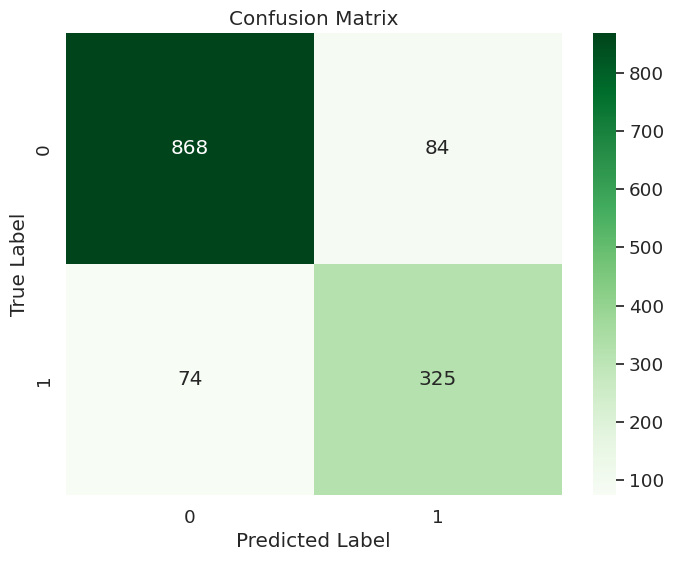

------------------------------------
Confusion matrix from original model
[[875  77]
 [ 98 301]]


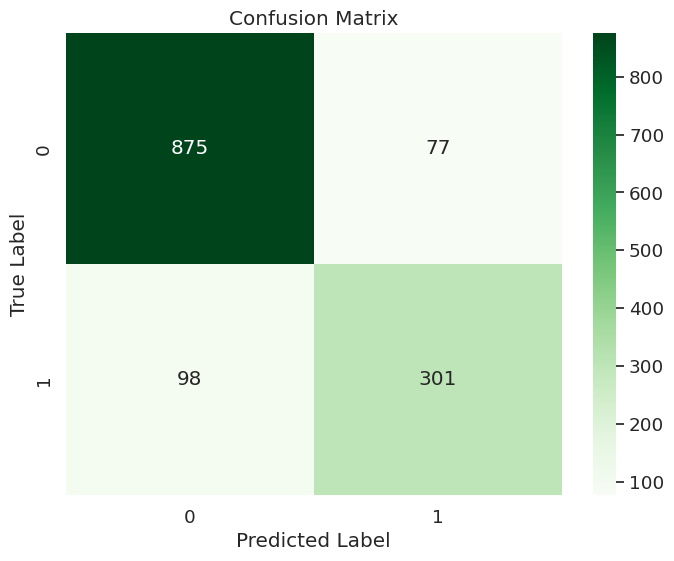

In [17]:
def plot_confusion_matrix(y_test, y_pred, class_names):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", 
                xticklabels=class_names, 
                yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

class_names = np.unique(y_train)
print("Confusion matrix from modified model")
plot_confusion_matrix(y_test, y_pred, class_names)
print("------------------------------------")
print("Confusion matrix from original model")
plot_confusion_matrix(y_test, y_pred_original, class_names)


<div>
    <h2 style="color: black;">Making ROC_AUC_CURVE</h2>
</div>

ROC_AUC_CURVE from modified model


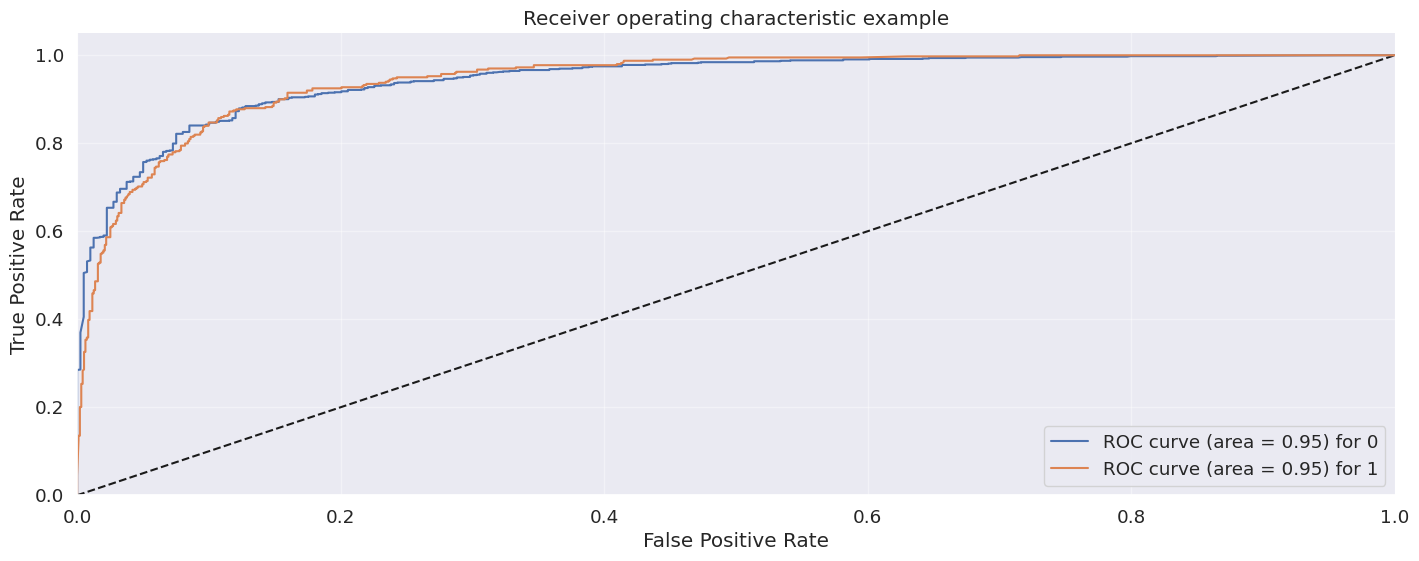

------------------------------------
ROC_AUC_CURVE from original model


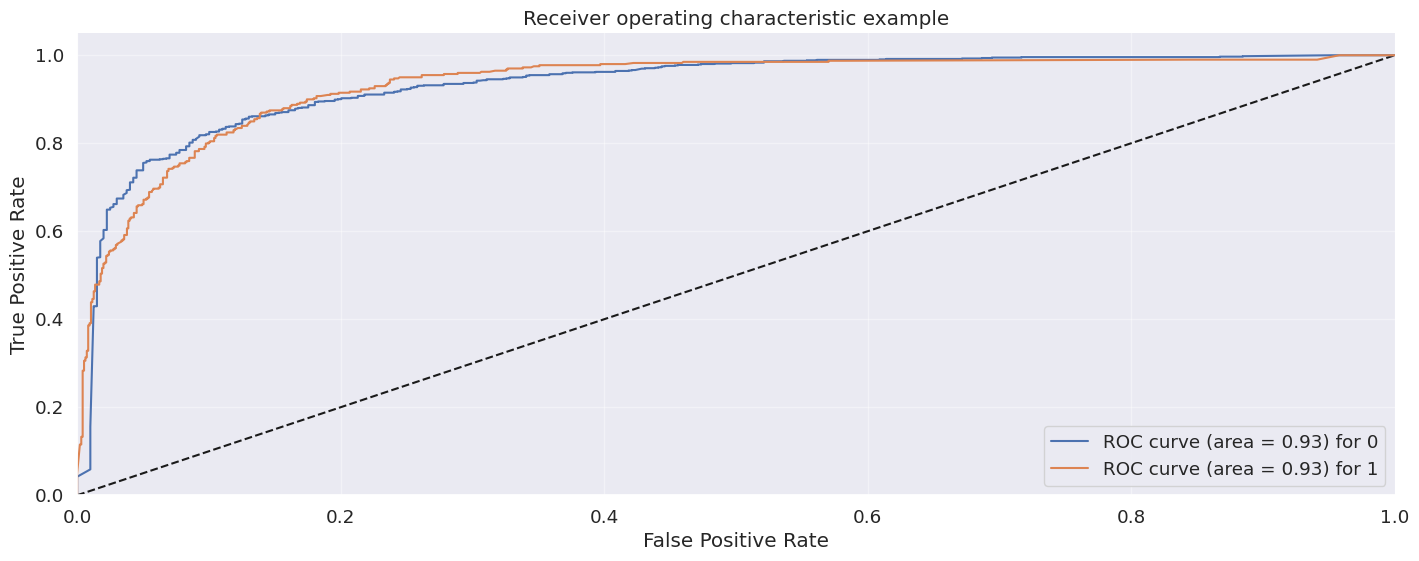

In [18]:
def plot_multiclass_roc(clf, X_test, y_test, class_names, figsize=(17, 6)):
    y_pred = clf._predict(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(class_names)

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {class_names[i]}')
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

class_names = np.unique(y_train)
print("ROC_AUC_CURVE from modified model")
plot_multiclass_roc(classifier, X_test, y_test, class_names)
print("------------------------------------")
print("ROC_AUC_CURVE from original model")
plot_multiclass_roc(classifier_original, X_test, y_test, class_names)

<div>
    <h2 style="color: black;">Making Balanced Accuracy Score</h2>
</div>

Balanced Accuracy Score from modified model
Balanced Accuracy Score: 0.86


/tmp/ipykernel_14827/3942384370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Balanced Accuracy'], y=[bal_acc], palette='Blues_d')


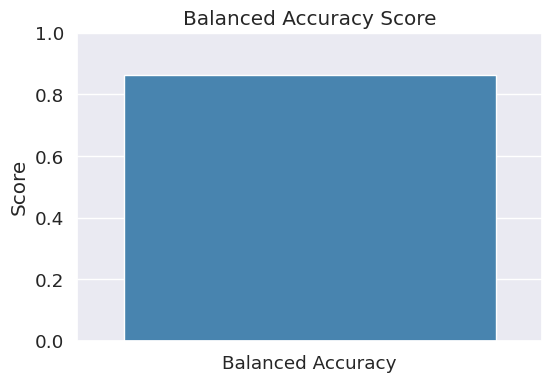

------------------------------------
Balanced Accuracy Score from original model
Balanced Accuracy Score: 0.84


/tmp/ipykernel_14827/3942384370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Balanced Accuracy'], y=[bal_acc], palette='Blues_d')


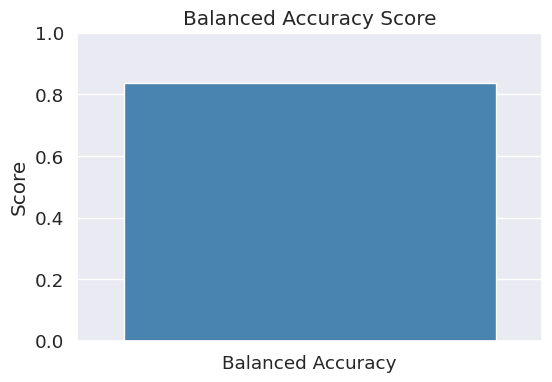

In [19]:
def plot_balanced_accuracy(y_test, y_pred):
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Balanced Accuracy Score: {bal_acc:.2f}")

    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.2) 
    sns.barplot(x=['Balanced Accuracy'], y=[bal_acc], palette='Blues_d')
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.title('Balanced Accuracy Score')
    plt.show()
print("Balanced Accuracy Score from modified model")
plot_balanced_accuracy(y_test, y_pred)
print("------------------------------------")
print("Balanced Accuracy Score from original model")
plot_balanced_accuracy(y_test, y_pred_original)

<div>
    <h2 style="color: black;">Different metrics to compare original and modified models</h2>
</div>

In [21]:
print("For Modified model")
print("Mean Squared Error:", mse(y_test, y_pred))
print("Root Mean Squared Error:", rmse(y_test, y_pred))
print("Mean Absolute Error:", mae(y_test, y_pred))
print("-----------------")
print("For Original model")
print("Mean Squared Error:", mse(y_test, y_pred_original))
print("Root Mean Squared Error:", rmse(y_test, y_pred_original))
print("Mean Absolute Error:", mae(y_test, y_pred_original))

For Modified model


TypeError: Object with dtype category cannot perform the numpy op subtract